# Clustering and predictive modeling for churn rate decrease for fitness club brand

### Project description
   
The fitness club chain is working on a data-based customer relationship strategy. There is data of customers with an indicator of churn at a certain month. The indicator of churn is no visits made by the customer within the last month.

**Objective**: analyse the data and prepare recommendations for clients retention.  

Scope:
- learn to predict the probability of a client's churn for the next month for each client;
- shape up typical clietns' portraits: indicate distinctive groups and describe their characteristics;
- analyse the features that affect churn the most; 
- make conclusions and provide recommendations for improving customer relationships:   
    1) identify customers target groups;  
    2) suggest churn decreasing measures;
    3) identify other defining traits that matter for customers relationships.

## Contents Navigation
- [Libraries](#libraries)  
- [1. Dataset Introduction](#dataintro)  
- [2. Data Cleaning and Preprocessing](#datacleaning)       
- [3. EDA](#analysis)
- [4. Churn Prediction Model ](#predictions)
- [5. Clustering](#clusters)
- [Conclusions](#conclusion)
 
<a name="back"></a>

### Libraries <a name="libraries"></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from math import factorial 
from scipy import stats as st 
import numpy as np 
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, silhouette_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
import warnings
warnings.filterwarnings('ignore')  

## 1. Dataset Introduction
<a name="dataintro"></a>
#### [back to navigation](#back) 

#### Dataset description
The **gym_churn** file contains data of the month before churn and if churn happened at a certain month. The dataset includes following columns:
- `Churn` — if churn happened within current month;  

User data for the month prior to checking the churn status:   
- `gender` — gender
- `Near_Location` — living or working in area near the fitness centre
- `Partner` — is an employee of a partner company of the club (employees of partner companies can get club membership for reduced price)
- `Promo_friends` — first attended the club via `bring a friend` promo` (used a friend`s promo-code while paying for membership at the first time)
- `Phone` — is there is a contact number 
- `Age` — age
- `Lifetime` — months since the first club attendance   

Information according to attendance journal, purchases and information about clients’ current status:  
- `Contract_period` — duration of the current membership contract (1 month, 3 months, 6 months, 12 months)
- `Month_to_end_contract` — number of months left until the end of the current contract
- `Group_visits` — if the client visited group classes
- `Avg_class_frequency_total` — average frequency of visits per week for the whole time since the beginning of the contract period
- `Avg_class_frequency_current_month` — average frequency of visits per week for the last month
- `Avg_additional_charges_total` — total revenue from additional club services (cafe, sport equipment, cosmetology and massage salon)

In [3]:
# upload the data
df = pd.read_csv('gym_ml_project10', index_col=0)
# check the table info and content
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 468.8 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
# check for nulls
nulls = pd.DataFrame(columns=['column'], data=df.columns)
nulls['nulls'] = df.isnull().sum().values
nulls['nulls_percentage'] = 100 * df.isnull().sum().values / df.shape[0]
nulls

,column,nulls,nulls_percentage
0,gender,0,0.0
1,Near_Location,0,0.0
2,Partner,0,0.0
3,Promo_friends,0,0.0
4,Phone,0,0.0
5,Contract_period,0,0.0
6,Group_visits,0,0.0
7,Age,0,0.0
8,Avg_additional_charges_total,0,0.0
9,Month_to_end_contract,0,0.0


In [5]:
# check if the values in Month_to_end_contract are integer
df['Month_to_end_contract'].unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

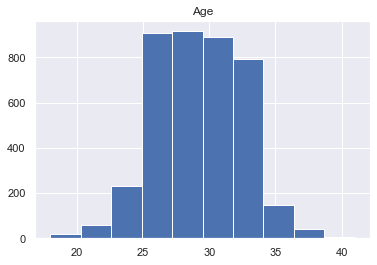

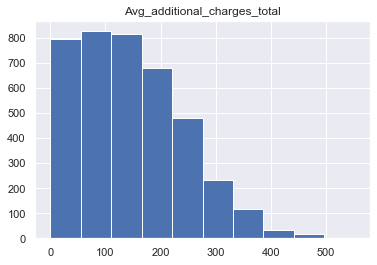

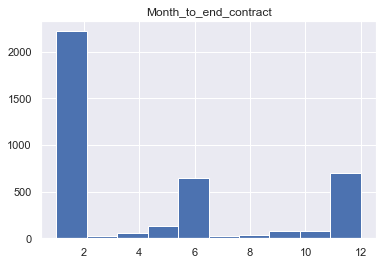

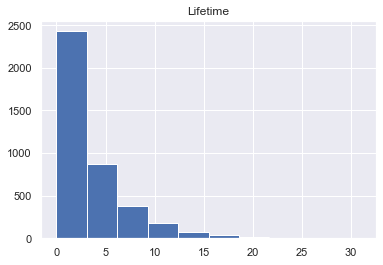

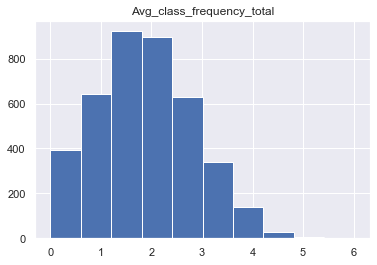

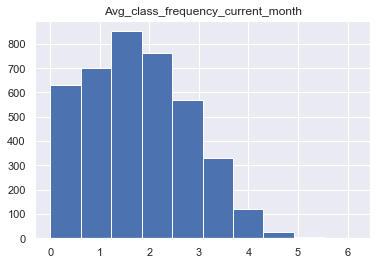

In [6]:
# check distribution of non-boolean values on histograms  
for column in ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 
               'Avg_class_frequency_total', 'Avg_class_frequency_current_month']:
    df.hist([column])
    

### Conclusion

All the data is numeric, no nulls.  
`Month_to_end_contract` may be converted to int, all the rest columns' data formats are correct.

## 2. Data Cleaning and Preprocessing 
<a name="datacleaning"></a>
#### [back to navigation](#back) 

In [7]:
# convert columns names to lowercase
df.columns = df.columns.str.lower()

### Duplicates 
<a name="douplicates"></a>

In [8]:
# duplicates check
df.duplicated().sum()

0

### Data types
<a name="datatypes"></a>

In [9]:
# convert month_to_end_contract data type to int
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0


### Conclusion
No duplicates found, all the columns have correct data types now. The data is ready for analysis.

## 3. Exploratory Data Analysis (EDA)
<a name="analysis"></a>
#### [back to navigation](#back) 

Let's go ahead with EDA.    
- Check the dataset for missing features, explore average values and standard deviation;
- Look at the average values of features in two groups — those who left (churn) and those who stayed;
- Build bar graphs and features distribution graphs for those who left (churn) and those who stayed (retain);
- Build and visualise a correlation matrix.

In [10]:
# Check the dataset for missing features, explore average values and standard deviation
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### General club members characteristics
According to the table above:  
- division by gender is approximately the same,
- most of the customers live or work nearby gym,
- slightly less than half came through the club partner companies,
- the vast majority of visitors provided their contact phone number,
- more than half of the clients signed a contract for 1 month,
- more than half of the clients did not attend group classes during the reviewed period,
- the typical age of a client of the club is 29 +- 3 years, minimal is 18,
- in general, clients spend additional 50-242$ in the fitness centers,
- most of the customers remain blub's clients for 0-6 months,
- more than half of the customers visit gym at least once a week.

In [11]:
# Estimate the total churn rate
print('Churn rate: {:.0%}'.format(len(df.loc[df['churn']==1]) / len(df)))

Churn rate: 27%


In [12]:
# Let's check the average values of features in two groups — those who left and those who stayed
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


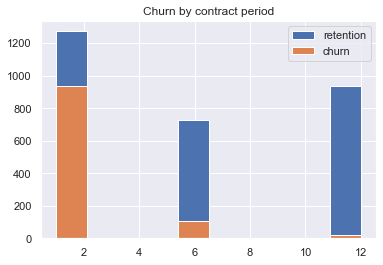

In [13]:
df.groupby('churn')['contract_period'].hist()
plt.title('Churn by contract period')
plt.legend(['retention', 'churn']);

#### Clients characteristics with division by churn (left) / retention (stayed)  
In the table above we see that:
- division by gender is approximately the same, so gender does not affect churn probability,
- among those who stopped attending the club, the majority still live nearby, however this figure is lower than in the group of retained clients,
- most of those who left are not employees of partner companies (in the group of those who stayed more than a half are),
- among those who stayed the share of those who came via promo is higher,
- the vast majority provided their contact number, this figure is almost the same in both groups,
- in the group of those who stayed the initial contract duration is, on average, higher,
- the share of clients who attended group classes is twice higher among those who stayed, 
- the average age of deceased clients is lower than the rest,
- on average, additional costs in the fitness centers are slightly higher among those who stayed,
- among those who have ceased to visit the fitness center, contract would have ended in 1-2 months. Those who continued visiting gym still had on average about 5 months till the end of the contract,
- on average, customers leave during the first month of going to gym,
- those who stayed visit the club more often than those who left. 

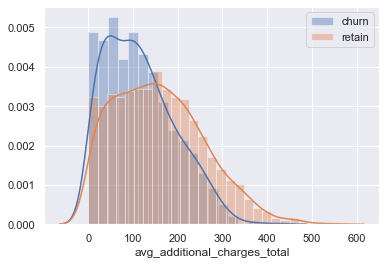

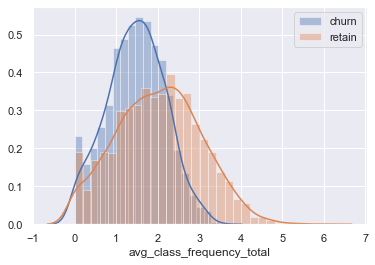

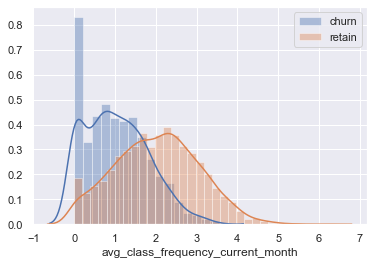

In [14]:
# diplots for continuous variables
displot_col = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
left = df.loc[df['churn']==1]
stayed = df.loc[df['churn']==0]
for column in displot_col:
    sns.distplot(left[column])
    sns.distplot(stayed[column])
    plt.legend(['churn', 'retain'])
    plt.show();

Here it is clear that most of those who left have not even show up in the club during the last month.

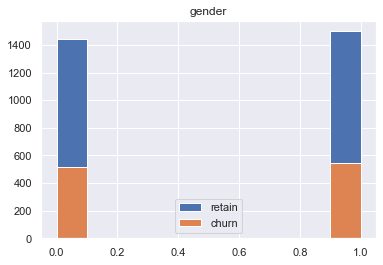

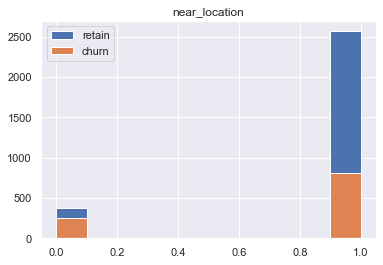

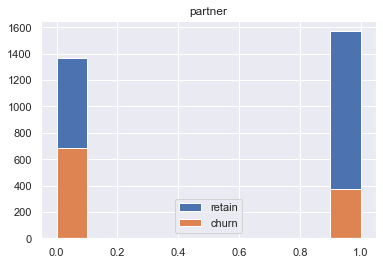

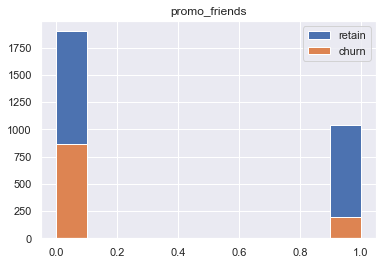

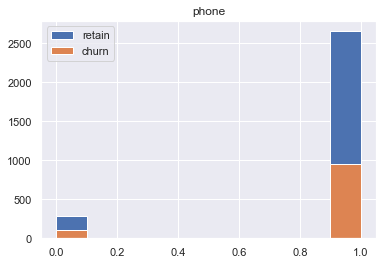

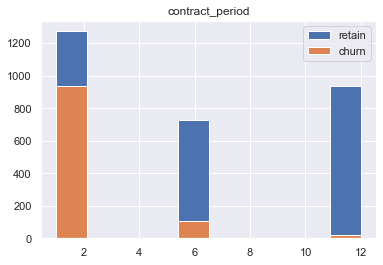

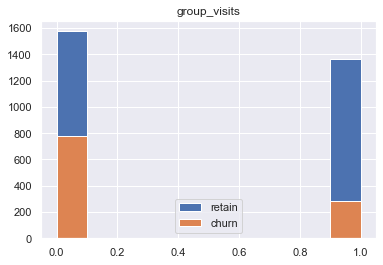

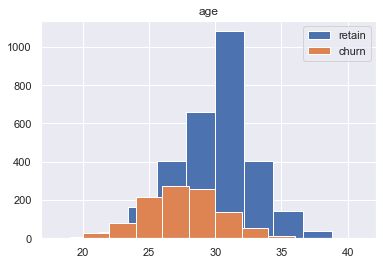

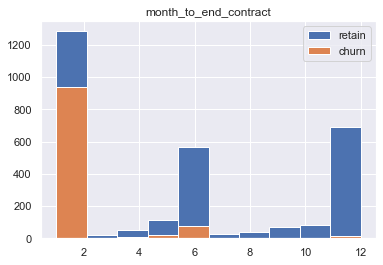

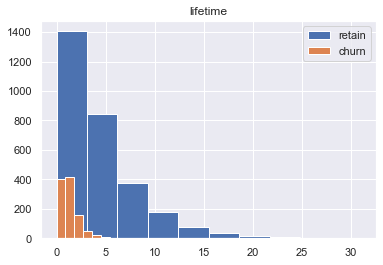

In [15]:
# distribution graphs for features of those who left (churn) and those who stayed (retain)
hist_col = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age', 'month_to_end_contract', 'lifetime']

for column in hist_col:
    df.groupby('churn')[column].hist()
    plt.legend(['retain', 'churn'])
    plt.title(column)
    plt.show()

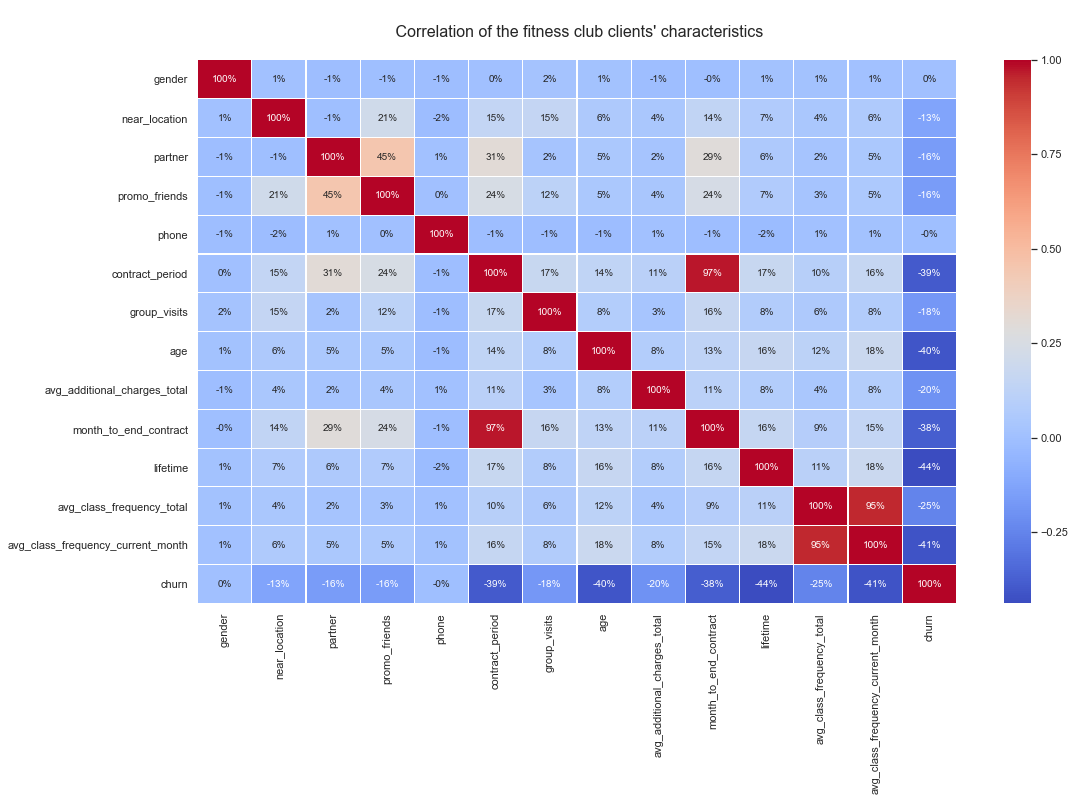

In [16]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap = 'coolwarm', linewidths=0.1)
ax.set_ylim(14,0)
ax.set_title("\n Correlation of the fitness club clients' characteristics\n", fontsize=16);

In the matrix we see that there is a strong correlation
- between the number of months till the end of the contract and the contract duration
- and between the average frequency of visits per week witin the last month and for the whole contract period.

This is caused by the fact that majority of the clients sign contracts for 1 month, so it is doubtful that these features are multicollinear.

No clear correlations between churn and any of the features are found. 


### Conclusion

We can suggest that following client's features are factors that increase the probability of churn:
- remoteness of the club from work/home,
- employer is not the club's partner company,
- the client did not come via the "bring a friend" promotion,
- a short contract period,
- no visits of group classes,
- age below 30,
- a short period remained until the end of the contract,
- the first month of visiting the club,
- rare visits of the club (less than 2 times a week).

No distinctive correlations between churn and any of the features are found.

## 4. Churn Prediction Model
<a name='predictions'></a>
#### [back to navigation](#back) 

**Let's build the predictive model of churn**  
We shall train the model of binary classification of clients, the *target feature is next month churn of a client*.  
We shall use `Random Forest` and `Logistic Regression` algorithms.  
We are going to use `accuracy`, `precision`, and `recall` metrics on the validation sample for both models to figure out which showed best results.

In [17]:
# Splitting the data into train and test sapmles

# break the data into features (X matrix) and target value (y)
X = df.drop(columns = ['churn'])
y = df['churn']

# split the model into train and test sapmles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create the StandardScaler class object and apply it to the train sample
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # train scaler and transform the train sample matrix 
# apply standartisation to the features matrix of the test sample
X_test_st = scaler.transform(X_test)

 Let's train the model with the train sample with 2 algorithms:
- logistic regression
- random forest

In [18]:
# For logistic regression model we shall choose the best random state
r_states = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]

accuracy_results = []
precision_results = []
recall_results = []
roc_auc_result = []
f1_scors = []

for state in r_states:
    lr = LogisticRegression(random_state=state) # define the algorithm for the logistic regression model
    lr.fit(X_train_st, y_train)  # train the model
    y_pred = lr.predict(X_test_st) 
    # use the trained model to make predictions
    y_prob = lr.predict_proba(X_test_st)[:,1]
    
    ac = accuracy_score(y_test, y_pred)
    accuracy_results.append(ac)
    
    pr = precision_score(y_test, y_pred)
    precision_results.append(pr)
    
    rc = recall_score(y_test, y_pred)
    recall_results.append(rc)
    
    f1 = f1_score(y_test, y_pred)
    f1_scors.append(f1)
    
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_result.append(roc)
    
d = {'model': 'Logistic Regression',
    'random_state': r_states,
     'accuracy': accuracy_results,
     'precision': precision_results,
     'recall': recall_results,
    'roc_auc': roc_auc_result,
    'f1': f1_scors}

lr_result = pd.DataFrame(data=d)
lr_result.sort_values(by = 'accuracy', ascending = False).head(1)

,model,random_state,accuracy,precision,recall,roc_auc,f1
0,Logistic Regression,1,0.9225,0.854167,0.828283,0.970402,0.841026


Logistic Regression model shows best accuracy results (92.25%) with random state = 1.  
Let's see if Random Forest can make it better. Here we shall pick 3 hyperparametres: n_estimators, 

In [19]:
# Chose best n_estimators for RandomForestClassifier model with a loop
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
accuracy_results = []
precision_results = []
recall_results = []
roc_auc_result = []
f1_scors = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, random_state=0)
    rf.fit(X_train_st, y_train)
    y_pred = rf.predict(X_test_st)
    y_prob = rf.predict_proba(X_test_st)[:,1]
    
    ac = accuracy_score(y_test, y_pred)
    accuracy_results.append(ac)
    
    pr = precision_score(y_test, y_pred)
    precision_results.append(pr)
    
    rc = recall_score(y_test, y_pred)
    recall_results.append(rc)
    
    f1 = f1_score(y_test, y_pred)
    f1_scors.append(f1)
    
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_result.append(roc)
    
# let's see which n_estimators value brings best accuracy results
d = {'n_estimators': n_estimators, 
     'accuracy': accuracy_results,
     'precision': precision_results,
     'recall': recall_results,
    'roc_auc': roc_auc_result,
    'f1': f1_scors}

pf = pd.DataFrame(data=d)
pf.sort_values(by = 'accuracy', ascending = False).head(3)

,n_estimators,accuracy,precision,recall,roc_auc,f1
38,39,0.92125,0.842640,0.838384,0.965460,0.840506
42,43,0.92125,0.839196,0.843434,0.965351,0.841310
44,45,0.92125,0.839196,0.843434,0.965683,0.841310


The random forest model shows best accuracy result (92.125%) with n_estimators = 39. Now let's check if max_depth parameter change can improve it.

In [33]:
# Choose best max_depth for RandomForestClassifier model with a loop

depth = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]

accuracy_results = []
precision_results = []
recall_results = []
roc_auc_result = []
f1_scors = []

for d in depth:
    rf = RandomForestClassifier(n_estimators=39, max_depth = d)
    rf.fit(X_train_st, y_train)
    y_pred = rf.predict(X_test_st)
    y_prob = rf.predict_proba(X_test_st)[:,1]
    
    ac = accuracy_score(y_test, y_pred)
    accuracy_results.append(ac)
    
    pr = precision_score(y_test, y_pred)
    precision_results.append(pr)
    
    rc = recall_score(y_test, y_pred)
    recall_results.append(rc)
    
    f1 = f1_score(y_test, y_pred)
    f1_scors.append(f1)
    
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_result.append(roc)
    
d = {'n_estimators': 39,
     'max_depth': depth,
     'accuracy': accuracy_results,
     'precision': precision_results,
     'recall': recall_results,
    'roc_auc': roc_auc_result,
    'f1': f1_scors}

pf = pd.DataFrame(data=d)
pf.sort_values(by = 'accuracy', ascending = False).head(3)

,n_estimators,max_depth,accuracy,precision,recall,roc_auc,f1
89,39,90,0.9275,0.860825,0.843434,0.969768,0.852041
95,39,96,0.9225,0.850515,0.833333,0.966840,0.841837
92,39,93,0.9225,0.850515,0.833333,0.969844,0.841837


With n_estimators=39 and max_depth=90 we got accuracy of 92.75%. It is already a bit better than the logistic regression model's 92.25% accuracy.  
Let's see if random_state change can make it even highter.

In [22]:
# Choose random_state for RandomForestClassifier model with a loop

r_states = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 1000)]

accuracy_results = []
precision_results = []
recall_results = []
roc_auc_result = []
f1_scors = []

for state in r_states:
    rf = RandomForestClassifier(n_estimators=39, max_depth=90, random_state=state)
    rf.fit(X_train_st, y_train)
    y_pred = rf.predict(X_test_st)
    y_prob = rf.predict_proba(X_test_st)[:,1]
    
    ac = accuracy_score(y_test, y_pred)
    accuracy_results.append(ac)
    
    pr = precision_score(y_test, y_pred)
    precision_results.append(pr)
    
    rc = recall_score(y_test, y_pred)
    recall_results.append(rc)
    
    f1 = f1_score(y_test, y_pred)
    f1_scors.append(f1)
    
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_result.append(roc)
    
d = {'model': 'Random Forest',
    'n_estimators': 39,
     'max_depth': 90,
    'random_state': r_states,
     'accuracy': accuracy_results,
     'precision': precision_results,
     'recall': recall_results,
    'roc_auc': roc_auc_result,
    'f1': f1_scors}

rf_result = pd.DataFrame(data=d)
rf_result.sort_values(by = 'accuracy', ascending = False).head(1)

,model,n_estimators,max_depth,random_state,accuracy,precision,recall,roc_auc,f1
589,Random Forest,39,90,590,0.92875,0.865285,0.843434,0.967436,0.85422


In [23]:
# merge the tables with both models results and sort by accuracy
rf_result.merge(lr_result, how='outer').sort_values(by = 'accuracy', ascending = False).head(1)

,model,n_estimators,max_depth,random_state,accuracy,precision,recall,roc_auc,f1
589,Random Forest,39.0,90.0,590,0.92875,0.865285,0.843434,0.967436,0.85422


#### Finally, the Random Forest model with n_estimators=39,	max_depth=90 and random_state=590 showed the best accuracy result of 92.875%. 

In [24]:
# Now let's look at the features weight in the final model

# train the final model
final_model = RandomForestClassifier(n_estimators=39, max_depth=90, random_state=state)
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)
importances = final_model.feature_importances_

# create dataframe with features names and their weights, sort by weight
features_weight = pd.DataFrame(importances, X.columns.tolist(), columns=['weight'])
features_weight.sort_values(by='weight', ascending=False)

,weight
lifetime,0.299001
avg_class_frequency_current_month,0.170472
avg_class_frequency_total,0.130643
age,0.112997
avg_additional_charges_total,0.084307
month_to_end_contract,0.070197
contract_period,0.064781
group_visits,0.016781
gender,0.012233
partner,0.011804


#### Conclusion
The Random Forest model with n_estimators=39, max_depth=90 and random_state=590 showed the best accuracy result of 92.875%.  
In this model, the most valuable feature is lifetime, also visits frequency and age matter considerbly. We better look at those features while thinking of churn control strategy.

## 5. Clustering
<a name='clusters'></a>
#### [back to navigation](#back) 

**Now we shall divide clients into clusters**   
- Drop churn, standartise data
- Build distance matrix of the standardised data and build a dendrogram. Based on the graph, suggest the number of clusters that can be distinguished
- Train clustering model with K-Means algorithm with 5 clusters (as stated by the client), and predict the clients clusters
- Explore average values of the clusters features
- Construct the distribution of characteristics for clusters 
- Build distribution graphs for the clusters features
- For each of the clusters calculate the churn share. Figure out which clusters are likely to churn, and which are stable

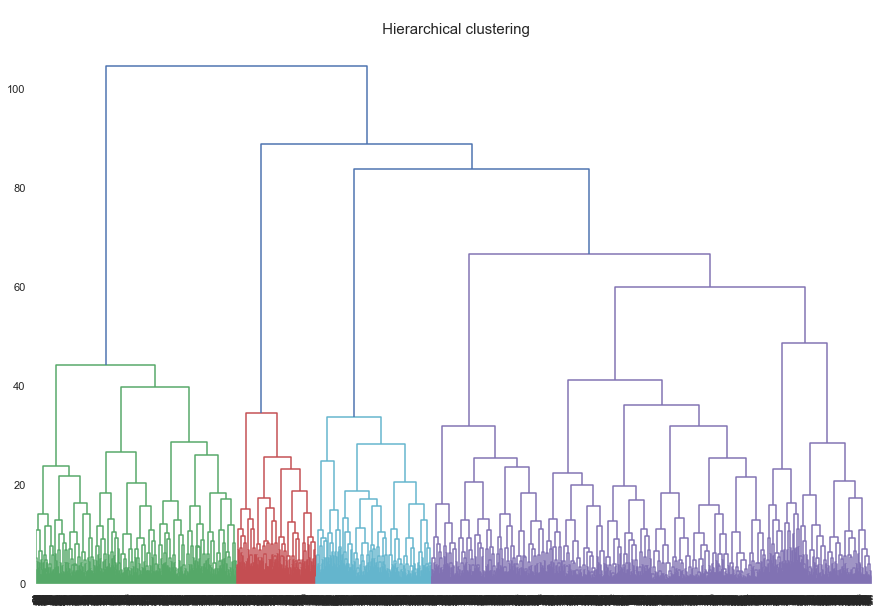

In [40]:
x_sc = scaler.fit_transform(X) # standardise the features matrix
linked = linkage(x_sc, method='ward') # distance matrix

# clusters dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Hierarchical clustering', fontsize=15)
plt.show();

According to the graph, we can build 4 clusters. However, as the client specifically requested for 5 of them, we shall put n_clusters=5.

In [26]:
# Tran the clustering model with K-Means algorithm

# define k_means model with 5 clusters 
km = KMeans(n_clusters = 5, random_state=0)
# predict clusters
labels = km.fit_predict(x_sc)

# save cluster labels in our dataset's column 
df['cluster_km'] = labels

# print stats of average values of features by cluster
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


### Clusters features distribution


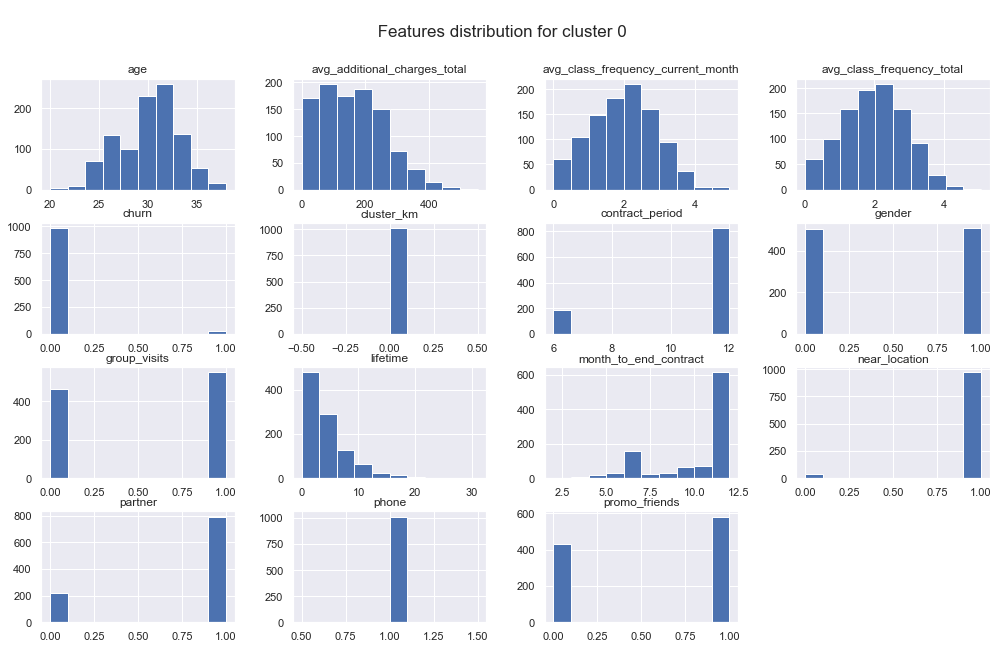

In [27]:
df.loc[df['cluster_km']==0].hist(figsize=(17,10))
plt.suptitle('\n Features distribution for cluster 0', fontsize=17);

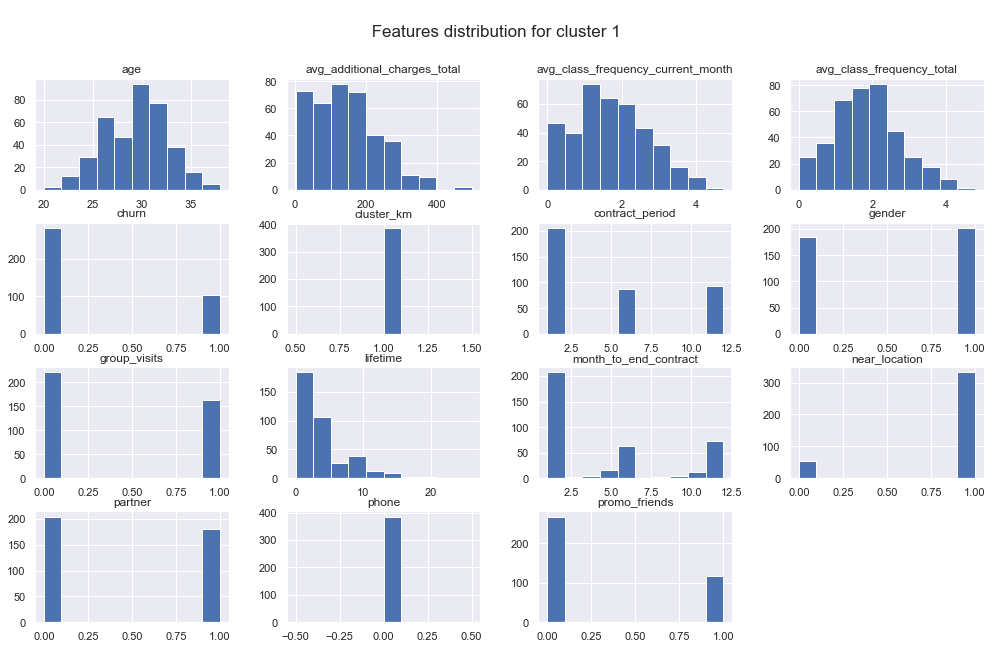

In [28]:
df.loc[df['cluster_km']==1].hist(figsize=(17,10))
plt.suptitle('\n Features distribution for cluster 1', fontsize=17);

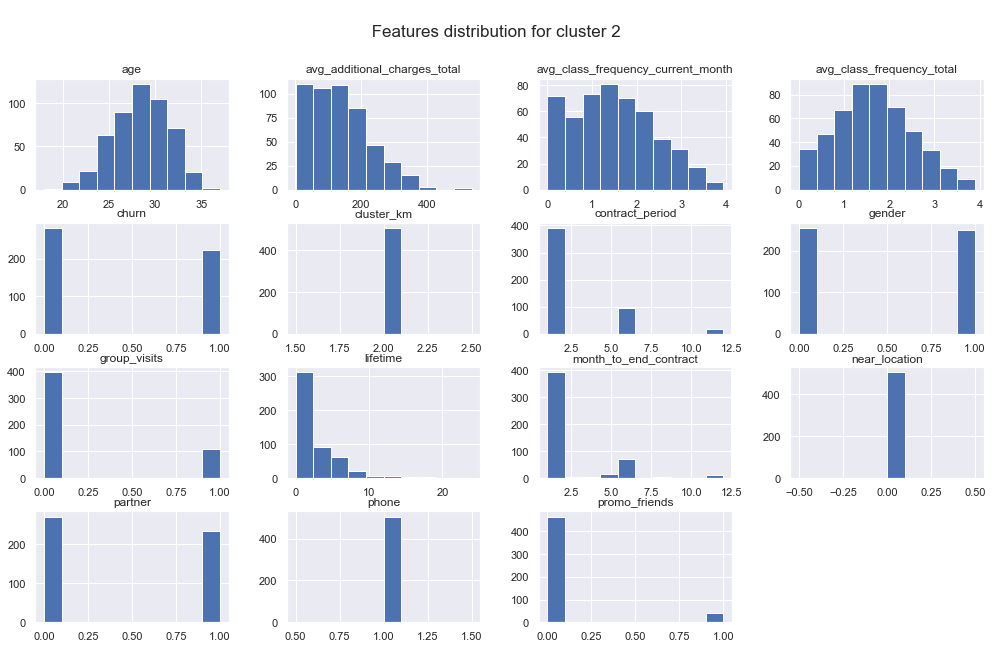

In [29]:
df.loc[df['cluster_km']==2].hist(figsize=(17,10))
plt.suptitle('\n Features distribution for cluster 2', fontsize=17);

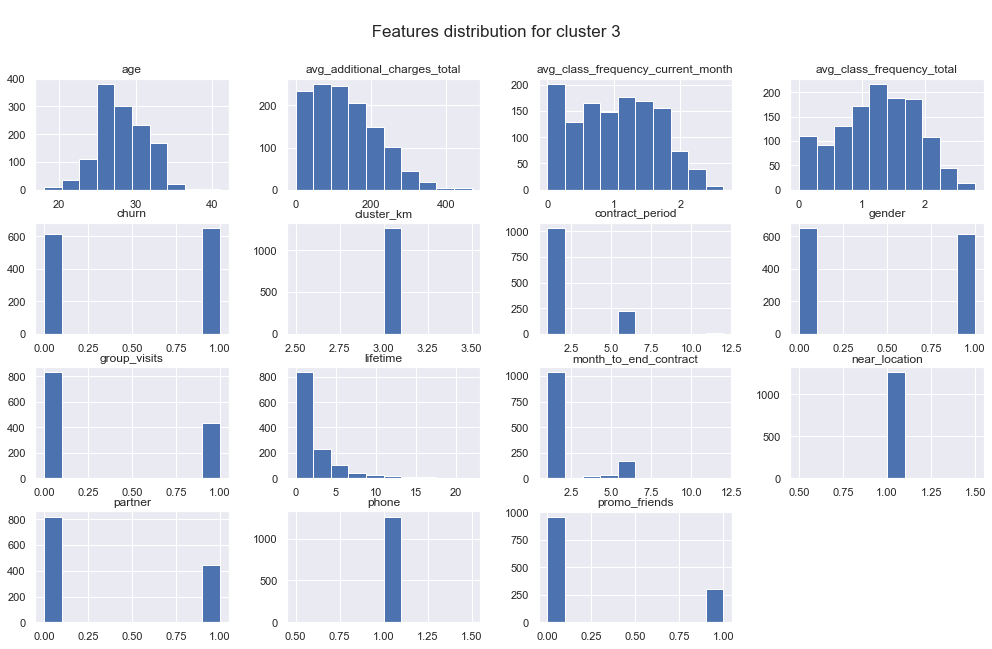

In [30]:
df.loc[df['cluster_km']==3].hist(figsize=(17,10))
plt.suptitle('\n Features distribution for cluster 3', fontsize=17);

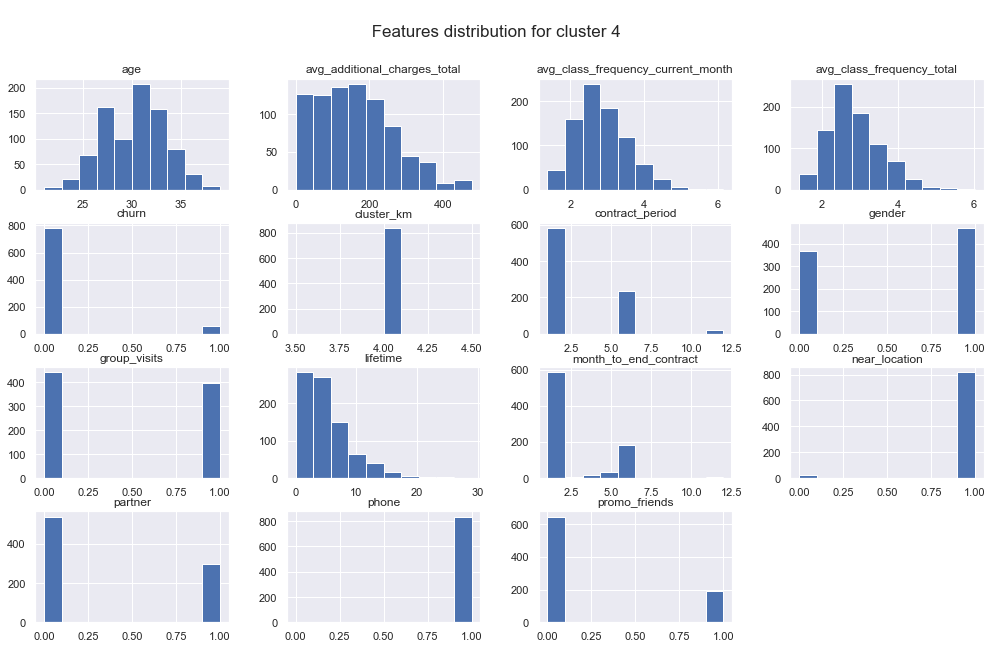

In [31]:
df.loc[df['cluster_km']==4].hist(figsize=(17,10))
plt.suptitle('\n Features distribution for cluster 4', fontsize=17);

In [37]:
# churn rate by cluster
churn_by_cluster = df.groupby('cluster_km')['churn'].mean().reset_index()
churn_by_cluster['churn'] = churn_by_cluster['churn'].map('{:,.0%}'.format)
churn_by_cluster

,cluster_km,churn
0,0,3%
1,1,27%
2,2,44%
3,3,51%
4,4,7%


**Clusters characteristics**:

**Cluster 0 - 3% churn probability** - average contract period of clients in this group is significantly higher (average 10.8 months), and they have been visiting the club for about 5 months on average (which is higher than in most of other clusters). Most of them are employees of the club’s partner companies. **These are loyal customers with long-term plans for gym and financial bonuses from partner companies. The probability of churn is minimal**. 

**Cluster 1 - 27% churn probability** - all clients who have not provided their phone number are grouped here. All other features of this cluster members are average. Churn probability for users of this cluster is same as average churn rate for all clients. **Most likely providing telephone number is not a significant factor for churn.**

**Cluster 2 - 44% churn probability** - all clients who live and work far away from the gym are grouped here. Almost none of them came via "bring a friend" promo. Despite the fact that these clients visit the club quite regularly, their churn probability is quite high. **Clearly, people prefer going to a fitness club that is close to their home or office, and together with friends.** 

**Cluster 3 - 51% churn probability** - includes customers who signed a short period contract with the club. They have the least number of months till their membership ends comparing to clients in other clusters. Besides, many of them visited the club seldom or have not visited it at all over the last month. **These people joined the club to give it a try, but have not not become regular visitors. The probability of churn among them is high**. 

**Cluster 4 - 7% churn probability** - these are clients who visit the club more often than the other groups (on average 2-3 times a week). Average age of these clients is slightly higher than in other clusters - 30 years old, and number of months since their first visit to the fitness centre is on average about 5 months (which is higher than in all the other clusters). **These are regular visitors of the club, the probability of losing them is low.**

### Conclusion

Whe split club's clients into 5 clusters by their characteristics combinations. We analised the characteristics of each clusters' users and their respective churn probability, and identified groups that are more likely to stop visiting the fitness club.

In the high churn risk group there are:  
- clients who signed up for a short period. Comparing to other clusters members they have less month left till the end of their contracts. Moreover, many of them stopped visiting the gym or visited it seldom during the last month. These are the people who joined the club to give it a try, but have not become regular visitors;   
- those who live and work far away from the club. Almost none of them came via the 'bring a friend' promotion. Despite the fact that these clients visit the club quite regularly, their churn probability is quite high. Clearly, people prefer going to a fitness club that is close to their home or office, and together with friends.

Among those who are less likely to leave there are:  
- clients who visit the club most ofthen (2-3 times per week on average). Average age of these clients is slightly higher than in other clusters - 30 years old, and number of months since their first visit to the fitness centre is on average about 5 months (which is higher than in all the other clusters);  
- clients with significantly longer contract period (10.8 months on average), and they have been visiting the club for about 5 months on average (which is higher than in most of other clusters). Most of them are employees of the club’s partner companies. These are loyal customers with long-term plans for gym and financial bonuses from partner companies. 

Also, we figured out that it does not matter for churn if a client provided his/hers contact number.

## Conclusions  <a name='conclusion'></a>
#### [back to navigation](#back) 


We looked into *general club members characteristics*:  
- division by gender is approximately the same,
- most of the customers live or work nearby gym,
- slightly less than half came through the club partner companies,
- the vast majority of visitors provided their contact phone number,
- more than half of the clients signed a contract for 1 month,
- more than half of the clients did not attend group classes during the reviewed period,
- the typical age of a client of the club is 29 +- 3 years, minimal is 18,
- in general, clients spend additional 50-242 usd in the fitness centers,
- most of the customers remain blub's clients for 0-6 months,
- more than half of the customers visit gym at least once a week,
- more than half of the clients visit the club at least once a week.

**Average churn rate is 27%**  
Our goal is to lower this metric. In order to do so, we shall try to understand which characteristics of clients make them more likely to churn, and develop a retention strategy targeting clients with similar characteristics.  

*After comparing features of those clients who left the club and those who remained a member*, we discovered:    
- division by gender is approximately the same, so gender does not affect churn probability,
- among those who stopped attending the club, the majority still live nearby, however this figure is lower than in the group of retained clients,
- most of those who left are not employees of partner companies (in the group of those who stayed more than a half are),
- among those who stayed the share of those who came via promo is higher,
- the vast majority provided their contact number, this figure is almost the same in both groups,
- in the group of those who stayed the initial contract duration is, on average, higher,
- share of clients who attended group classes is twice higher among those who stayed,
- the average age of deceased clients is lower than the rest,
- on average, additional costs in the fitness centers are slightly higher among those who stayed,
- among those who have ceased to visit the fitness center, contract would have ended in 1-2 months. Those who continued visiting gym still had on average about 5 months till the end of the contract,
- on average, customers leave during the first month of going to gym,
- those who stayed visit the club more often than those who left.

Thus, we can suggest that following client's features are factors that increase the probability of churn:
- remoteness of the club from work/home,
- employer is not the club's partner company,
- the client did not come via the "bring a friend" promotion,
- a short contract period,
- no visits of group classes,
- age below 30,
- a short period remained until the end of the contract,
- the first month of visiting the club,
- rare visits of the club (less than 2 times a week).

No distinctive correlations between churn and any of the features are found. 


We trained models of binary classification of clients with a client's next month churn as target feature. We used Random Forest and Logistic Regression algorithms.  
The **Random Forest model** with n_estimators=39, max_depth=90 and random_state=590 showed the best accuracy result of 92.875%. In this model, the most valuable feature is **lifetime**, also **visits frequency** and **age** matter considerbly. We better look at those features while thinking of churn control strategy.


Also, we split the sample into **5 clusters** and explored their characteristics and respective churn probability.

Clusters characteristics:  

**Cluster 0 - 3% churn probability** - average contract period of clients in this group is significantly higher (average 10.8 months), and they have been visiting the club for about 5 months on average (which is higher than in most of other clusters). Most of them are employees of the club’s partner companies. **These are loyal customers with long-term plans for gym and financial bonuses from partner companies. The probability of churn is minimal**. 

**Cluster 1 - 27% churn probability** - all clients who have not provided their phone number are grouped here. All other features of this cluster members are average. Churn probability for users of this cluster is same as average churn rate for all clients. **Most likely providing telephone number is not a significant factor for churn.**

**Cluster 2 - 44% churn probability** - all clients who live and work far away from the gym are grouped here. Almost none of them came via "bring a friend" promo. Despite the fact that these clients visit the club quite regularly, their churn probability is quite high. **Clearly, people prefer going to a fitness club that is close to their home or office, and together with friends.** 

**Cluster 3 - 51% churn probability** - includes customers who signed a short period contract with the club. They have the least number of months till their membership ends comparing to clients in other clusters. Besides, many of them visited the club seldom or have not visited it at all over the last month. **These people joined the club to give it a try, but have not not become regular visitors. The probability of churn among them is high**. 

**Cluster 4 - 7% churn probability** - these are clients who visit the club more often than the other groups (on average 2-3 times a week). Average age of these clients is slightly higher than in other clusters - 30 years old, and number of months since their first visit to the fitness centre is on average about 5 months (which is higher than in all the other clusters). **These are regular visitors of the club, the probability of losing them is low.**

Thus, clients with characteristics similar to those  of clusters 2 and 3 are more likely to stop visiting the club. We can create special promotions for such clients, as well as more favorable terms for those who sign longer membership contracts right away (e.g., time-limited promo with lower price for 12 months membership).  
Also it would be good to focus on attracting clients who live and work in the area nearby the club. For example, to set geo targeting of the online ads to this area.